In [6]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('TIME_SERIES_INFO.csv', engine='python',sep=';')

In [11]:
type(dataset)

pandas.core.frame.DataFrame

In [12]:
dataset.shape

(108, 33)

In [13]:
dataset.columns

Index(['date_arb', 'entrant', 'sortant', 'pm_euro', 'pm_uc', 'euro_sortant',
       'euro_chp_sortant', 'euro_arb_sortant', 'euro_entrant',
       'euro_chp_entrant', 'euro_arb_entrant', 'Date', 'CAC Index',
       'CACR Index', 'mois', 'annee', 'cac_m1', 'cac_m2', 'cac_m3', 'cac_m12',
       'Opinion_des_menages', 'Niveau_de_vie_passee',
       'Niveau_de_vie_evolution', 'Chomage_evolution', 'Prix_evol_passee',
       'Prix_evol_futur', 'Opportunite_achats_importants',
       'Opportunite_epargner', 'Capacite_epargne_actuelle',
       'Sit_fin_perso_passee', 'Sit_fin_perso_evolution',
       'Capacite_epargne_future', 'moyenne'],
      dtype='object')

In [14]:
dataset.head(10)

,date_arb,entrant,sortant,pm_euro,pm_uc,euro_sortant,euro_chp_sortant,euro_arb_sortant,euro_entrant,euro_chp_entrant,...,Chomage_evolution,Prix_evol_passee,Prix_evol_futur,Opportunite_achats_importants,Opportunite_epargner,Capacite_epargne_actuelle,Sit_fin_perso_passee,Sit_fin_perso_evolution,Capacite_epargne_future,moyenne
0,28/02/2010,260525.45,-239198.42,4.659260e+08,1.186484e+08,0.000513,0.0,0.000513,0.002196,0.0,...,55.377135,-14.151685,-40.567761,-18.184410,14.106581,9.636793,-23.833049,-9.120357,-3.223886,0.16
1,31/03/2010,592522.69,-513574.47,4.738208e+08,1.179550e+08,0.001084,0.0,0.001084,0.005023,0.0,...,48.674356,-19.343749,-41.388570,-22.588658,14.698451,6.062176,-27.083320,-11.760946,-7.744934,0.19
2,30/04/2010,503654.31,-167046.34,4.860875e+08,1.242040e+08,0.000344,0.0,0.000344,0.004055,0.0,...,58.155534,-18.885327,-39.415141,-21.160530,14.028201,6.707492,-25.544961,-13.027848,-5.299320,0.24
3,31/05/2010,672082.91,-165410.85,4.954631e+08,1.231308e+08,0.000334,0.0,0.000334,0.005458,0.0,...,57.195378,-10.005514,-34.471280,-23.546331,11.164737,7.191304,-26.884147,-15.903729,-7.002948,0.26
4,30/06/2010,267851.36,-60660.70,5.041454e+08,1.193398e+08,0.000120,0.0,0.000120,0.002244,0.0,...,57.653770,-10.782346,-27.689779,-21.462135,9.073209,6.030436,-26.904870,-18.596450,-8.384921,0.43
5,31/07/2010,103657.45,-233087.13,5.130312e+08,1.178845e+08,0.000454,0.0,0.000454,0.000879,0.0,...,64.577869,-9.574144,-28.575043,-21.084698,4.681760,6.297476,-27.415768,-19.365789,-7.813309,0.50
6,31/08/2010,118089.99,-35427.01,5.195021e+08,1.230383e+08,0.000068,0.0,0.000068,0.000960,0.0,...,58.940294,-6.491853,-27.072015,-22.253046,14.143143,4.891334,-29.680345,-19.495207,-12.809431,0.57
7,30/09/2010,512980.14,-51075.16,5.273828e+08,1.229123e+08,0.000097,0.0,0.000097,0.004174,0.0,...,45.996288,-4.422473,-24.468999,-18.946749,20.776381,6.452756,-28.760688,-18.186860,-6.418167,0.81
8,31/10/2010,586794.04,-47680.83,5.364655e+08,1.249075e+08,0.000089,0.0,0.000089,0.004698,0.0,...,31.039373,-2.380891,-29.011984,-16.995300,19.502183,4.977723,-28.426837,-17.551348,-8.497818,0.87
9,30/11/2010,100205.64,-315560.22,5.447983e+08,1.262189e+08,0.000579,0.0,0.000579,0.000794,0.0,...,34.490017,-0.431166,-25.075033,-17.409831,24.490309,4.727322,-27.517488,-15.013907,-7.719744,0.89


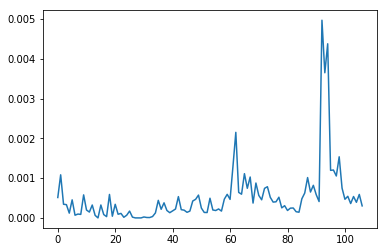

In [19]:
plt.plot(dataset['euro_sortant'])
plt.show()

# Multilayer Perceptron Regression

In [21]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [22]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [67]:
dataframe = pandas.read_csv('TIME_SERIES_INFO.csv',usecols=[5],engine='python',sep=';')
dataset = dataframe.values*10000
dataset = dataset.astype('float32')

In [68]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

72 36


In [69]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [70]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [71]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 1s - loss: 28.8465
Epoch 2/200
 - 0s - loss: 26.4015
Epoch 3/200
 - 0s - loss: 24.4808
Epoch 4/200
 - 0s - loss: 22.6071
Epoch 5/200
 - 0s - loss: 20.9436
Epoch 6/200
 - 0s - loss: 19.3414
Epoch 7/200
 - 0s - loss: 17.9731
Epoch 8/200
 - 0s - loss: 16.6479
Epoch 9/200
 - 0s - loss: 15.4312
Epoch 10/200
 - 0s - loss: 14.4442
Epoch 11/200
 - 0s - loss: 13.5164
Epoch 12/200
 - 0s - loss: 12.7432
Epoch 13/200
 - 0s - loss: 12.0740
Epoch 14/200
 - 0s - loss: 11.5583
Epoch 15/200
 - 0s - loss: 11.0929
Epoch 16/200
 - 0s - loss: 10.7317
Epoch 17/200
 - 0s - loss: 10.4547
Epoch 18/200
 - 0s - loss: 10.2146
Epoch 19/200
 - 0s - loss: 10.0617
Epoch 20/200
 - 0s - loss: 9.8934
Epoch 21/200
 - 0s - loss: 9.8044
Epoch 22/200
 - 0s - loss: 9.7484
Epoch 23/200
 - 0s - loss: 9.6996
Epoch 24/200
 - 0s - loss: 9.6423
Epoch 25/200
 - 0s - loss: 9.5989
Epoch 26/200
 - 0s - loss: 9.5998
Epoch 27/200
 - 0s - loss: 9.5565
Epoch 28/200
 - 0s - loss: 9.5482
Epoch 29/200
 - 0s - loss: 9.5310
Epoc

In [72]:
# Estimate model performance
import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 9.42 MSE (3.07 RMSE)
Test Score: 89.99 MSE (9.49 RMSE)


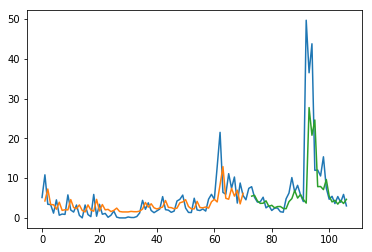

In [73]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
 
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Multilayer Perceptron Using the Window Method

Epoch 1/400
 - 1s - loss: 23.4185
Epoch 2/400
 - 0s - loss: 20.5752
Epoch 3/400
 - 0s - loss: 18.4396
Epoch 4/400
 - 0s - loss: 16.6571
Epoch 5/400
 - 0s - loss: 14.9547
Epoch 6/400
 - 0s - loss: 13.4073
Epoch 7/400
 - 0s - loss: 12.1919
Epoch 8/400
 - 0s - loss: 11.1143
Epoch 9/400
 - 0s - loss: 10.2778
Epoch 10/400
 - 0s - loss: 9.6461
Epoch 11/400
 - 0s - loss: 9.2746
Epoch 12/400
 - 0s - loss: 9.0090
Epoch 13/400
 - 0s - loss: 8.9191
Epoch 14/400
 - 0s - loss: 8.7380
Epoch 15/400
 - 0s - loss: 8.7135
Epoch 16/400
 - 0s - loss: 8.6676
Epoch 17/400
 - 0s - loss: 8.6358
Epoch 18/400
 - 0s - loss: 8.5658
Epoch 19/400
 - 0s - loss: 8.6280
Epoch 20/400
 - 0s - loss: 8.5794
Epoch 21/400
 - 0s - loss: 8.5469
Epoch 22/400
 - 0s - loss: 8.5654
Epoch 23/400
 - 0s - loss: 8.4108
Epoch 24/400
 - 0s - loss: 8.4419
Epoch 25/400
 - 0s - loss: 8.3972
Epoch 26/400
 - 0s - loss: 8.3796
Epoch 27/400
 - 0s - loss: 8.3197
Epoch 28/400
 - 0s - loss: 8.4013
Epoch 29/400
 - 0s - loss: 8.3409
Epoch 30/400
 

Epoch 238/400
 - 0s - loss: 6.2964
Epoch 239/400
 - 0s - loss: 6.3176
Epoch 240/400
 - 0s - loss: 6.4736
Epoch 241/400
 - 0s - loss: 6.3420
Epoch 242/400
 - 0s - loss: 6.3046
Epoch 243/400
 - 0s - loss: 6.3757
Epoch 244/400
 - 0s - loss: 6.4548
Epoch 245/400
 - 0s - loss: 6.3180
Epoch 246/400
 - 0s - loss: 6.3012
Epoch 247/400
 - 0s - loss: 6.3140
Epoch 248/400
 - 0s - loss: 6.3211
Epoch 249/400
 - 0s - loss: 6.2263
Epoch 250/400
 - 0s - loss: 6.2346
Epoch 251/400
 - 0s - loss: 6.1947
Epoch 252/400
 - 0s - loss: 6.2534
Epoch 253/400
 - 0s - loss: 6.2684
Epoch 254/400
 - 0s - loss: 6.2246
Epoch 255/400
 - 0s - loss: 6.2428
Epoch 256/400
 - 0s - loss: 6.1897
Epoch 257/400
 - 0s - loss: 6.2813
Epoch 258/400
 - 0s - loss: 6.3888
Epoch 259/400
 - 0s - loss: 6.2964
Epoch 260/400
 - 0s - loss: 6.2912
Epoch 261/400
 - 0s - loss: 6.3846
Epoch 262/400
 - 0s - loss: 6.1352
Epoch 263/400
 - 0s - loss: 6.2139
Epoch 264/400
 - 0s - loss: 6.1723
Epoch 265/400
 - 0s - loss: 6.0997
Epoch 266/400
 - 0s 

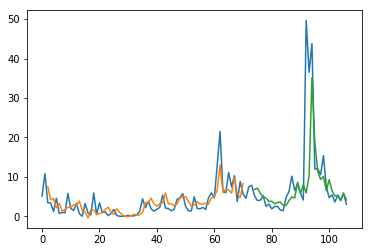

In [75]:
# Multilayer Perceptron to Predict (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
 
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('TIME_SERIES_INFO.csv',usecols=[5],engine='python',sep=';')
dataset = dataframe.values * 10000
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()